In [15]:
import numpy as np
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 600)

In [16]:
file_prefix='done_'
file_pattern = os.path.join("./data/jira_trem/", f'{file_prefix}*.csv')
csv_files = glob.glob(file_pattern)

dataframes = []
for file in csv_files:
    dataframes.append(pd.read_csv(file))
df = pd.concat(dataframes, ignore_index=True)
df.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project lead id,Project description,Project url,Priority,Resolution,Assignee,Assignee Id,Reporter,Reporter Id,Creator,Creator Id,Created,Updated,Last Viewed,Resolved,Affects versions,Affects versions.1,Fix versions,Fix versions.1,Due date,Votes,Labels,Labels.1,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers Id,Watchers Id.1,Watchers Id.2,Watchers Id.3,Log Work,Log Work.1,Log Work.2,Log Work.3,Log Work.4,Log Work.5,Log Work.6,Log Work.7,Log Work.8,Log Work.9,Log Work.10,Log Work.11,Log Work.12,Log Work.13,Log Work.14,Log Work.15,Log Work.16,Log Work.17,Log Work.18,Log Work.19,Log Work.20,Log Work.21,Log Work.22,Log Work.23,Log Work.24,Log Work.25,Log Work.26,Log Work.27,Log Work.28,Log Work.29,Log Work.30,Original estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level,Inward issue link (Blocks),Inward issue link (Blocks).1,Inward issue link (Blocks).2,Inward issue link (Blocks).3,Inward issue link (Blocks).4,Inward issue link (Blocks).5,Outward issue link (Blocks),Inward issue link (Cloners),Outward issue link (Cloners),Inward issue link (Defect),Outward issue link (Defect),Outward issue link (Duplicate),Inward issue link (Gantt End to Start),Outward issue link (Gantt End to Start),Inward issue link (Issue split),Outward issue link (Issue split),Inward issue link (Parent-Child),Outward issue link (Parent-Child),Inward issue link (Problem/Incident),Inward issue link (Relates),Inward issue link (Relates).1,Inward issue link (Relates).2,Outward issue link (Relates),Outward issue link (Relates).1,Outward issue link (Relates).2,Outward issue link (Relates).3,Outward issue link (Relates).4,Outward issue link (Relates).5,Outward issue link (Relates).6,Inward issue link (Test),Outward issue link (Test),Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Attachment.13,Attachment.14,Attachment.15,Attachment.16,Attachment.17,Attachment.18,Attachment.19,Attachment.20,Attachment.21,Attachment.22,Attachment.23,Attachment.24,Attachment.25,Attachment.26,Attachment.27,Attachment.28,Attachment.29,Attachment.30,Attachment.31,Attachment.32,Attachment.33,Attachment.34,Attachment.35,Attachment.36,Attachment.37,Attachment.38,Attachment.39,Attachment.40,Attachment.41,Attachment.42,Attachment.43,Attachment.44,Attachment.45,Attachment.46,Attachment.47,Attachment.48,Attachment.49,Attachment.50,Attachment.51,Attachment.52,Attachment.53,Attachment.54,Attachment.55,Attachment.56,Attachment.57,Attachment.58,Attachment.59,Attachment.60,Attachment.61,Attachment.62,Attachment.63,Attachment.64,Attachment.65,Attachment.66,Attachment.67,Attachment.68,Attachment.69,Custom field (Actual end),Custom field (Actual start),Custom field (Affected hardware),Custom field (Affected services),Custom field (Approvals),Custom field (Backout plan),Custom field (Baseline end date),Custom field (Baseline start date),Custom field (Billable),Custom field (Category),Custom field (Change reason),Custom field (Change risk),Custom field (Change type),Custom field (Checklists),Custom field (Client),Custom field (Craft),Custom field (Date of First Response),Custom field (Date of first comment),Custom field (Dev Estimation (mds)),Custom field (Development),Custom field (End date),Custom field (Engagement Type),Custom field (Epic Color),Custom field (Epic Link),Epic Link Summary,Custom field (Epic Name),Custom field (Epic Status),Custom field (Estimation Zoom Level),Custom field (FirstBundle),Custom field (Flagged),Custom field (Goals),Custom field (Impact),Custom field (Implementation plan),Custom field (Investigation reason),Custom field (Issue Origin),Custom field (Issue color),Custom field (Locked forms),Custom field (Major incident),Custom field (Open forms),Custom field (Operational 

In [17]:
df.shape

(11448, 523)

In [18]:
cols = ['Summary', 'Issue id', 'Issue Type', 'Status', 'Priority', 'Resolution', 'Assignee Id', 'Reporter Id', 
            'Creator Id', 'Created', 'Resolved', 'Affects versions', 'Fix versions', 'Due date', 'Labels', 
            'Description', 'Environment', 'Original estimate', 'Time Spent', 'Security Level', 
            'Custom field (Affected services)',
            'Custom field (Billable)', 'Custom field (Category)', 'Custom field (Issue Origin)',
            'Custom field (Severity)', 'Sprint', 'Custom field (Start date)', 'Custom field (Test Environment)',
            'Parent', 'Status Category', 'Status Category Changed', 'Components']
df = df[cols]
# 重命名一些列名
df =df.rename(columns={
    'Custom field (Affected services)': 'Affected Services',
    'Custom field (Billable)': 'Billable',
    'Custom field (Category)': 'Category',
    'Custom field (Issue Origin)': 'Issue Origin',
    'Custom field (Severity)': 'Severity',
    'Custom field (Start date)': 'Start Date',
    'Custom field (Test Environment)': 'Test Environment'
})
df.head()

,Summary,Issue id,Issue Type,Status,Priority,Resolution,Assignee Id,Reporter Id,Creator Id,Created,Resolved,Affects versions,Fix versions,Due date,Labels,Description,Environment,Original estimate,Time Spent,Security Level,Affected Services,Billable,Category,Issue Origin,Severity,Sprint,Start Date,Test Environment,Parent,Status Category,Status Category Changed,Components
0,[BE] User administration - investigate possibl...,1163599,Task,Done,Medium,Resolved,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,07/Aug/24 5:42 PM,08/Aug/24 11:08 AM,NaN,1.4.7,NaN,NaN,Recently the max number of hikari connections ...,NaN,28800.0,28800.0,NaN,NaN,Yes,NaN,NaN,NaN,Sprint 121,07/Aug/24 3:17 PM,NaN,246114.0,Done,12/Aug/24 9:29 AM,NaN
1,[Auth0] Test and fix the SAML signout flow,1161742,Task,Done,Medium,Resolved,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,31/Jul/24 9:35 AM,02/Aug/24 10:44 AM,NaN,1.4.7,NaN,NaN,The SAML signout flow has been disabled for a ...,NaN,28800.0,28800.0,NaN,NaN,Yes,NaN,NaN,NaN,Sprint 121,31/Jul/24 7:39 AM,NaN,270169.0,Done,02/Aug/24 3:24 PM,NaN
2,[CNUNV] [MES16] Bedford - SAML Integration wit...,1161334,Task,Done,Medium,Resolved,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,29/Jul/24 6:59 PM,05/Aug/24 11:58 AM,NaN,1.4.7,NaN,NaN,Ticket cloned from 42Q Jira by Luis (DSR-4810)...,NaN,57600.0,57600.0,NaN,NaN,Yes,NaN,NaN,NaN,Sprint 121,02/Aug/24 5:10 AM,NaN,270169.0,Done,06/Aug/24 6:07 PM,NaN
3,Add agent property on conduit calls: Productio...,1160317,Task,Done,Medium,Resolved,5e1309decbf1830daa9ce746,5e1309decbf1830daa9ce746,5e1309decbf1830daa9ce746,24/Jul/24 6:10 PM,01/Aug/24 10:03 AM,NaN,1.4.7,NaN,NaN,NaN,NaN,3600.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Sprint 121,01/Aug/24 2:03 AM,NaN,NaN,Done,01/Aug/24 11:38 AM,NaN
4,[BE] Update the static-resource-cache and widg...,1160309,Task,Done,Medium,Resolved,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,24/Jul/24 5:08 PM,02/Aug/24 10:09 AM,NaN,1.4.7,NaN,NaN,"Currently, the images for static-resource-cach...",NaN,28800.0,28800.0,NaN,NaN,Yes,NaN,NaN,NaN,Sprint 121,31/Jul/24 10:04 AM,NaN,246114.0,Done,02/Aug/24 3:12 PM,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Summary                  11448 non-null  object 
 1   Issue id                 11448 non-null  int64  
 2   Issue Type               11448 non-null  object 
 3   Status                   11448 non-null  object 
 4   Priority                 11448 non-null  object 
 5   Resolution               11429 non-null  object 
 6   Assignee Id              11051 non-null  object 
 7   Reporter Id              11448 non-null  object 
 8   Creator Id               11448 non-null  object 
 9   Created                  11448 non-null  object 
 10  Resolved                 11429 non-null  object 
 11  Affects versions         4127 non-null   object 
 12  Fix versions             6887 non-null   object 
 13  Due date                 59 non-null     object 
 14  Labels                

In [20]:
# 删除值大部分为null的列
df.drop(columns=['Environment', 'Components', 'Category', 'Affected Services', 'Security Level', 'Due date'], inplace=True)

In [21]:
# 进行时间转换
df['Created'] = pd.to_datetime(df['Created'])
df['Resolved'] = pd.to_datetime(df['Resolved'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Status Category Changed'] = pd.to_datetime(df['Status Category Changed'])
# 计算时间间隔，并转换为小时
#df['Resolved Time'] = (df['Resolved'] - df['Created']).dt.total_seconds() / 60 / 60

# 字段填空
df['Parent'] = df['Parent'].fillna(0)
df['Parent'] = df['Parent'].astype(int)
df['Description'] = df['Description'].fillna('')
df['Issue Origin'] = df['Issue Origin'].fillna('Unknown')
df['Billable'] = df['Billable'].fillna('No')
df['Severity'] = df['Severity'].fillna('Unknown')
df['Labels'] = df['Labels'].fillna('Unknown')
df['Test Environment'] = df['Test Environment'].fillna('Unknown')
df['Assignee Id'] = df['Assignee Id'].fillna('Unknown')
df['Affects versions'] = df['Affects versions'].fillna('Unknown')
df['Assignee Id'] = df['Assignee Id'].fillna('Unknown')

# 生成新字段
df['Week'] = df['Created'].dt.isocalendar().week
df['Month'] = df['Created'].dt.month
df['Summary Length'] = df['Summary'].str.len()
df['Description Length'] = df['Description'].str.len()


In [22]:
# 进行数据转换
df['Parent'] = df['Parent'].apply(lambda x: 1 if x != 0 else 0)
df['Billable'] = df['Billable'].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Summary                  11448 non-null  object        
 1   Issue id                 11448 non-null  int64         
 2   Issue Type               11448 non-null  object        
 3   Status                   11448 non-null  object        
 4   Priority                 11448 non-null  object        
 5   Resolution               11429 non-null  object        
 6   Assignee Id              11448 non-null  object        
 7   Reporter Id              11448 non-null  object        
 8   Creator Id               11448 non-null  object        
 9   Created                  11448 non-null  datetime64[ns]
 10  Resolved                 11429 non-null  datetime64[ns]
 11  Affects versions         11448 non-null  object        
 12  Fix versions             6887 no

In [25]:
df['Resolution'].value_counts()

Resolution
Resolved                   10660
Functions as Designed        381
Cannot Reproduce             115
Duplicate                     84
Invalid                       79
Won't Do                      56
Out of Scope                  21
Out of Date                   19
Not Yet Implemented            5
Not a business priority        3
Done                           2
Declined                       2
Software failure               1
Known Error                    1
Name: count, dtype: int64

In [26]:
df['Priority'].value_counts()

Priority
Medium     9713
High        697
Low         674
Highest     288
Lowest       76
Name: count, dtype: int64

<h2>Spent Time回归任务</h2>

In [27]:
# 选取有用的列
data = df[['Issue id', 'Issue Type', 'Summary', 'Description', 'Parent', 'Issue Origin', 'Reporter Id', 'Assignee Id', 'Billable', 'Severity', 'Affects versions', 'Summary Length', 'Description Length', 'Test Environment', 'Week', 'Month','Priority', 'Time Spent']]
data.dropna(subset=['Time Spent'], inplace=True)
# 删除异常值
data = data[(data['Time Spent'] > 0) & (data['Time Spent'] < data['Time Spent'].quantile(0.95))]
# 将Time Spent从秒转换为小时
data['Time Spent'] = data['Time Spent'] / 3600
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9679 entries, 0 to 11447
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Issue id            9679 non-null   int64  
 1   Issue Type          9679 non-null   object 
 2   Summary             9679 non-null   object 
 3   Description         9679 non-null   object 
 4   Parent              9679 non-null   int64  
 5   Issue Origin        9679 non-null   object 
 6   Reporter Id         9679 non-null   object 
 7   Assignee Id         9679 non-null   object 
 8   Billable            9679 non-null   int64  
 9   Severity            9679 non-null   object 
 10  Affects versions    9679 non-null   object 
 11  Summary Length      9679 non-null   int64  
 12  Description Length  9679 non-null   int64  
 13  Test Environment    9679 non-null   object 
 14  Week                9679 non-null   UInt32 
 15  Month               9679 non-null   int32  
 16  Priority  

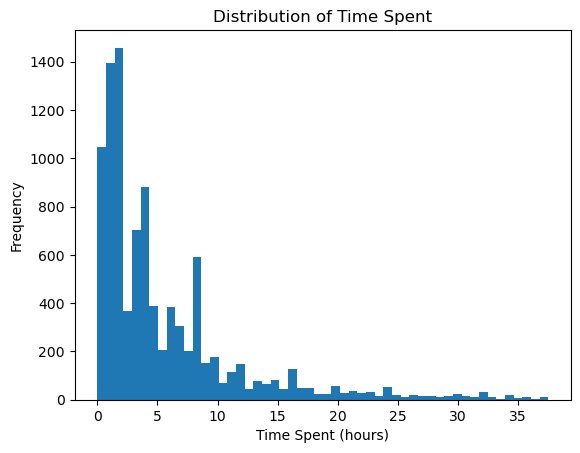

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# 画出Time Spent的分布
plt.hist(data['Time Spent'], bins=52)
plt.xlabel('Time Spent (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent')
plt.show()

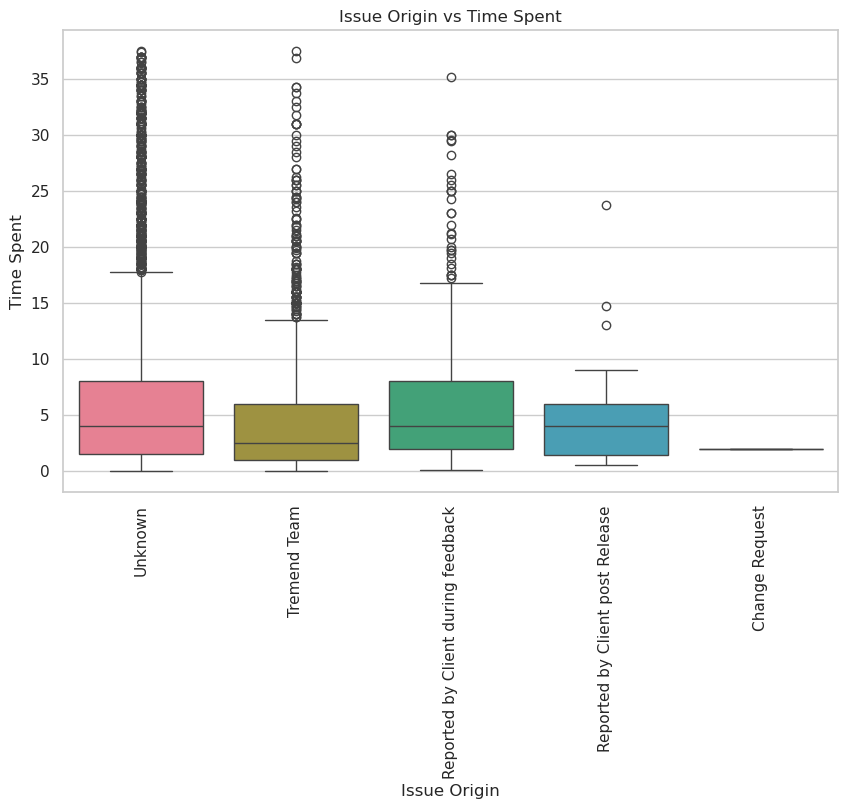

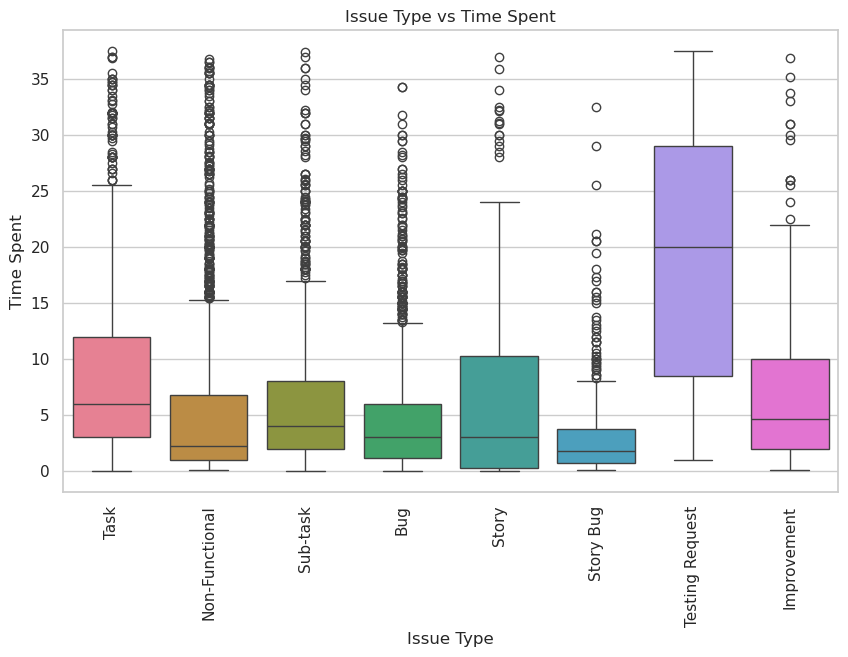

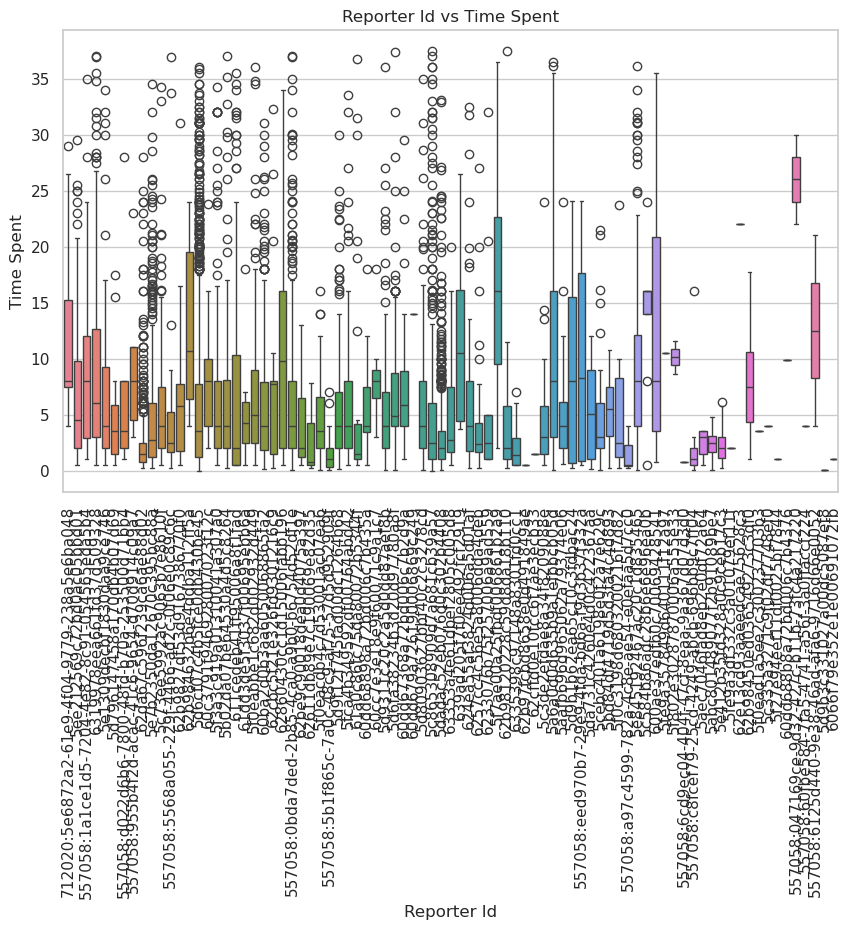

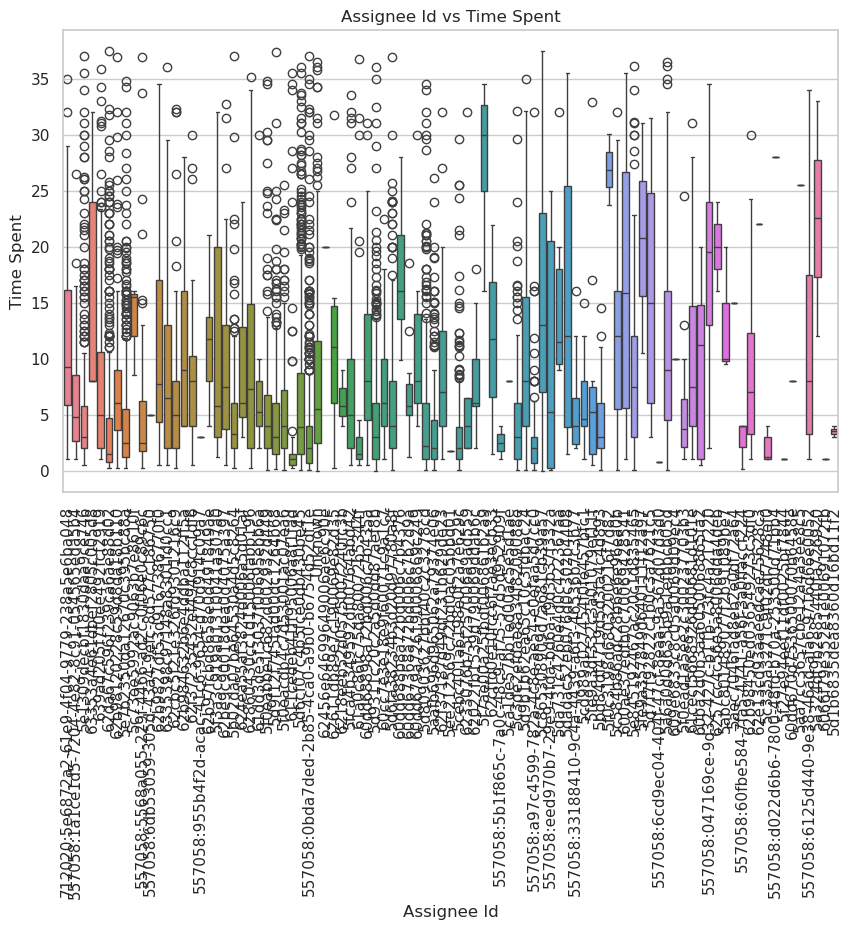

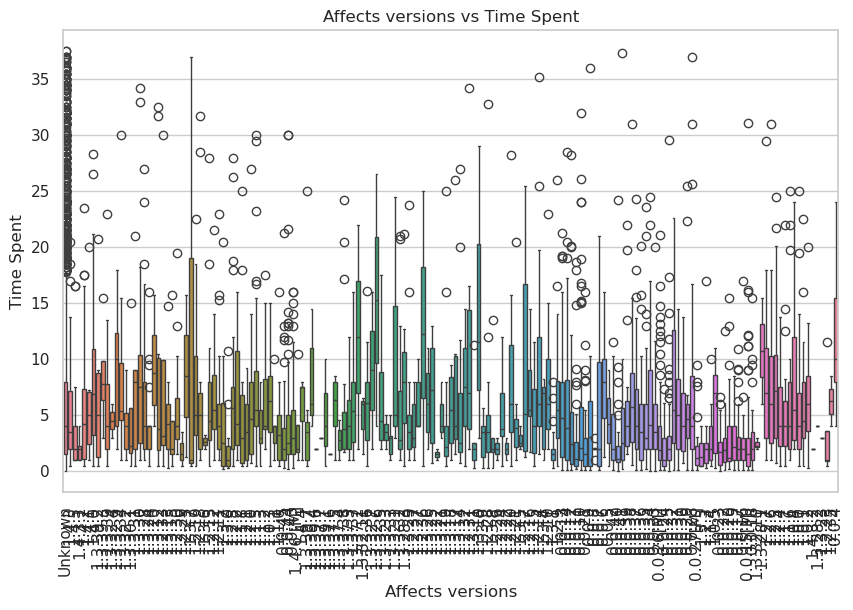

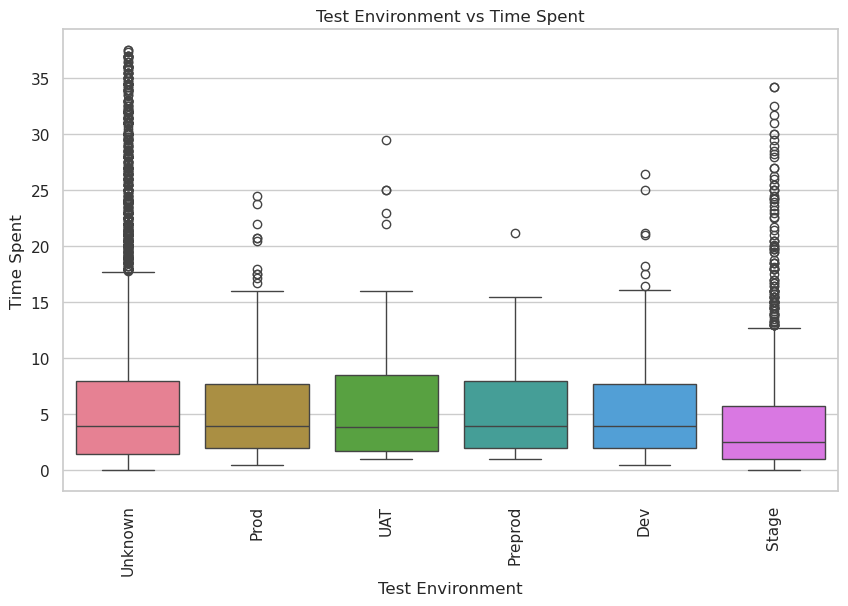

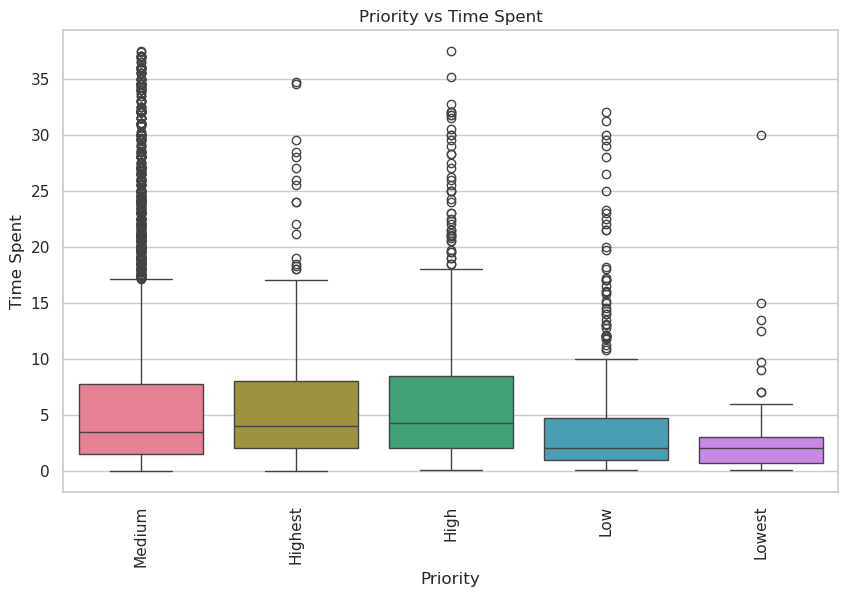

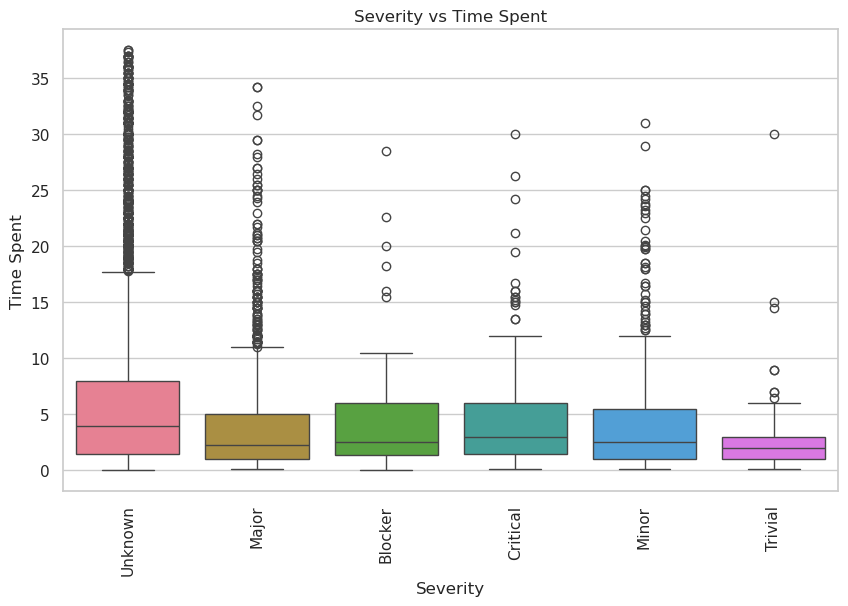

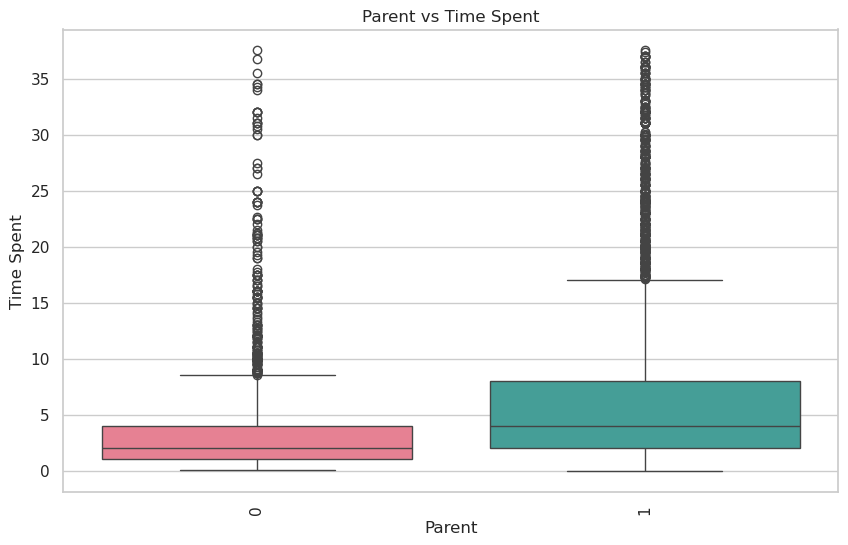

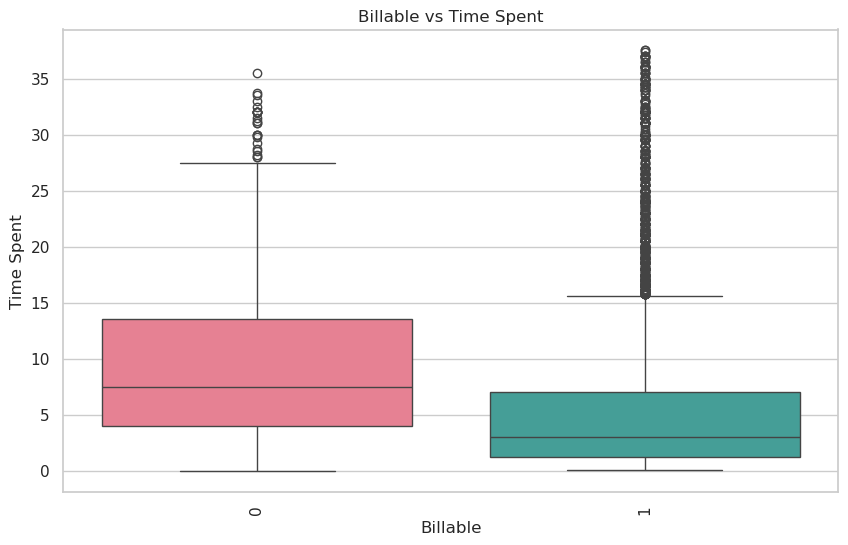

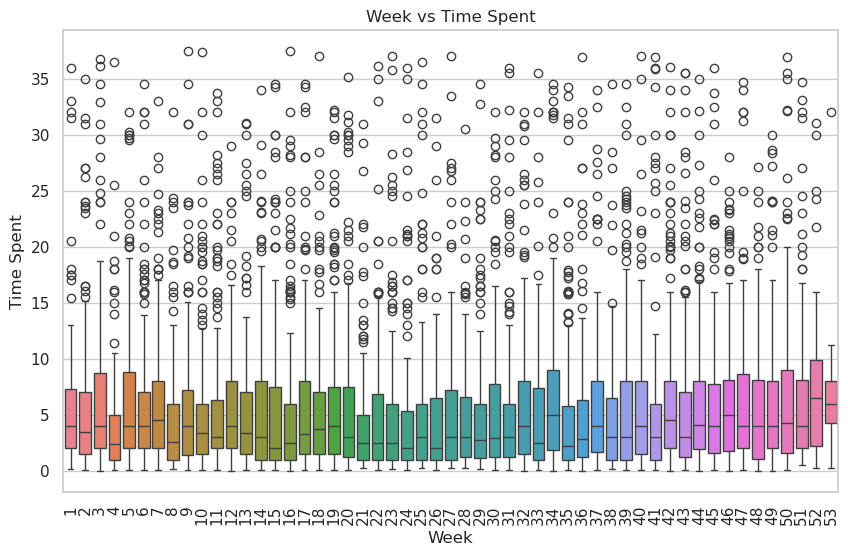

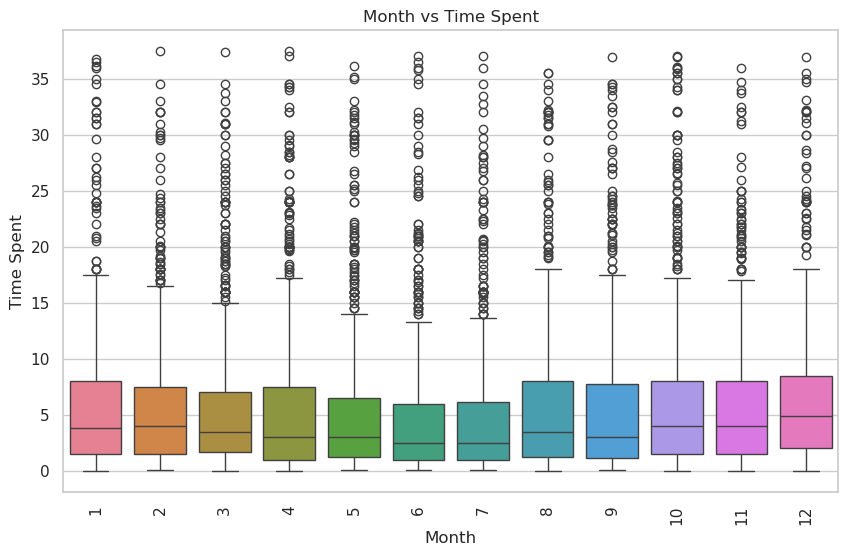

In [29]:
# 特征列表
categorical_features = ['Issue Origin', 'Issue Type', 'Reporter Id', 'Assignee Id', 'Affects versions', 'Test Environment', 'Priority', 'Severity', 'Parent', 'Billable', 'Week', 'Month']

# 设置图形风格
sns.set_theme(style="whitegrid")

# 绘制每个类别型特征的Time Spent分布
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Get unique categories and create a color for each
    unique_categories = data[feature].unique()
    colors = sns.color_palette("husl", len(unique_categories))
    
    sns.boxplot(x=feature, y='Time Spent', data=data, palette=colors)
    plt.title(f'{feature} vs Time Spent')
    plt.xticks(rotation=90)
    plt.show()

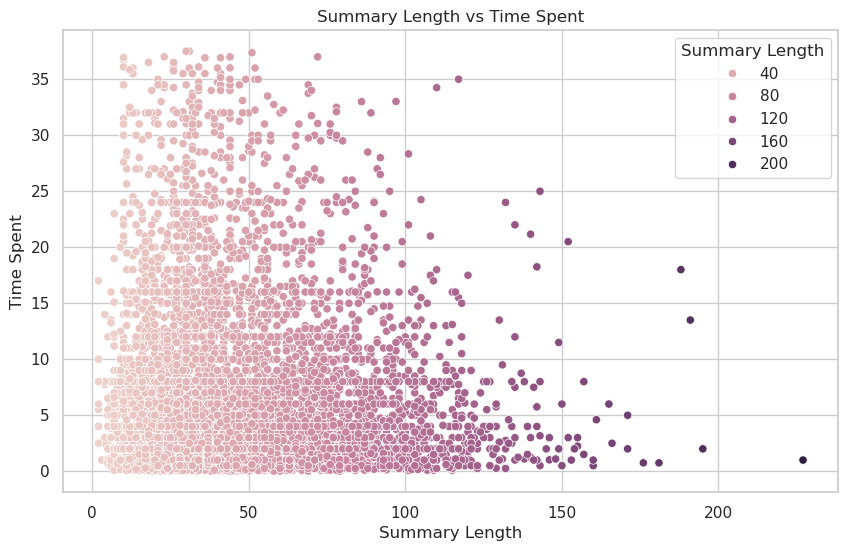

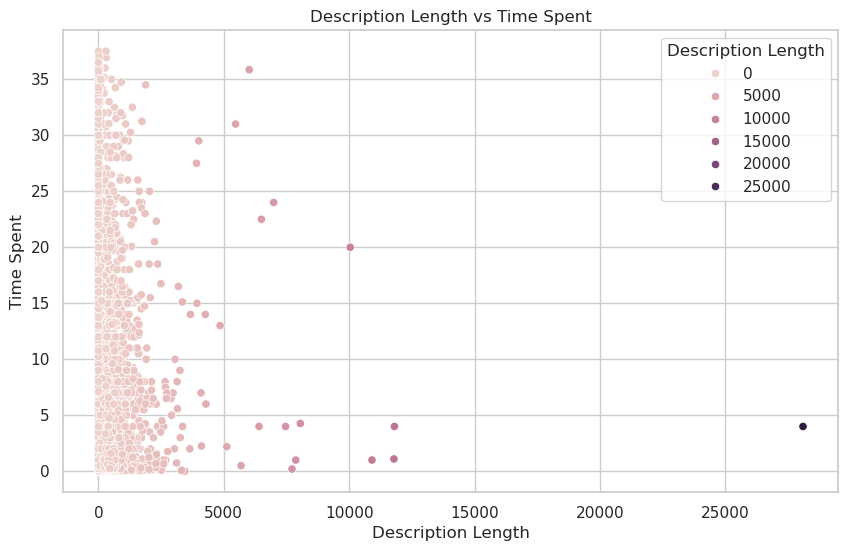

In [30]:
numeric_features = ['Summary Length', 'Description Length']
# 绘制每个数值型特征的Time Spent关系图
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Time Spent', data=data, hue=feature)
    plt.title(f'{feature} vs Time Spent')
    plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 编码标签类型数据 'Affects versions',
label_columns = ['Issue Origin', 'Issue Type', 'Reporter Id', 'Assignee Id', 'Priority', 'Severity', 'Week', 'Month', 'Test Environment']
for col in label_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

X_cat = data[label_columns].values

文本处理

In [32]:
import string, re, nltk
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [33]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

# 转换为小写
def convert_to_lowercase(text):
    return text.lower()

# 去除文本两边空格
def strip_text(text):
    return text.strip()

# 移除标点符号
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    return re.sub(f"[{re.escape(punct_str)}]", " ", text)

# 移除标题的标点符号
def remove_summary_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    punct_str = punct_str.replace("_", "")
    return re.sub(f"[{re.escape(punct_str)}]", " ", text)

# 移除数字token
def remove_number_token(text):
    words = text.split()
    # 过滤掉纯数字的词
    filtered_words = [word for word in words if not re.match(r'^\d+$', word)]
    # 将词按空格合并成句子
    combined_sentence = ' '.join(filtered_words).strip()
    return combined_sentence

# 移除html标签
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(' ', text)

# 移除表情
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(' ', text)

# 移除http链接
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, " ", text)

# Dictionary of acronyms
acronyms_url = './data/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')
acronyms_list = list(acronyms_dict.keys())

# remove html tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(' ', text)

# 移除文本中包含的image tag
def remove_image_tags(text):
    # Define the regular expression pattern to match the image tags
    pattern = re.compile(r'!.*?!')
    cleaned_text = pattern.sub(' ', text)
    return cleaned_text

# 移除文本中{}的内容
def remove_bracket(text):
    pattern = re.compile(r'\{.*?\}')
    return pattern.sub(' ', text)

# 移除文本中||的内容
def remove_table(text):
    pattern = re.compile(r'\|.*?\|')
    return pattern.sub(' ', text)

# 移除文本中**的内容
def remove_star(text):
    pattern = re.compile(r'\*.*?\*')
    return pattern.sub(' ', text)

# convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

# Dictionary of contractions
contractions_url = './data/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
# List of contractions
contractions_list = list(contractions_dict.keys())

# convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

# 移除停用词
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    
    # 使用正则表达式 tokenizer 处理缩写和标点
    tokenizer = RegexpTokenizer(r'\w+\'?\w+|\w+')
    words = tokenizer.tokenize(text)
    
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Stemming 词干提取，stemming. 如 "running", "runner" 会被转换成 "run".
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

# Lemmatization 词形还原. 如Better被还原为good
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()
def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

# 移除非字母的词
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

# 根据词性过滤单词, 如过滤连词(conjunctions), 介词(prepositions)。保留名词(nouns)、形容词和动词
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'FW', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

# Additional stopwords
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
custom_words = ["thank", "hi", "hello", "regard", "issue", "please", "cc"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others + custom_words

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

In [34]:
# 处理标题
def summary_normalizer(text):
    text = strip_text(text)
    text = convert_to_lowercase(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_number_token(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    text = strip_text(text)
    text = re.sub(' +', ' ', text)
    return text

# 处理内容
def description_normalizer(text):
    text = convert_to_lowercase(text)
    text = strip_text(text)
    text = re.sub('\n', ' ', text) # converting text to one line
    text = re.sub('\[.*?\]', ' ', text) # removing square brackets
    text = remove_http(text)
    text = remove_image_tags(text)
    text = remove_bracket(text)
    text = remove_table(text)
#    text = remove_star(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    text = re.sub(' +', ' ', text)  # replace multiple spaces with a single space
    text = strip_text(text)
    return text

In [35]:
data['normalized_summary'] = data['Summary'].apply(summary_normalizer)
data['normalized_description'] = data['Description'].apply(description_normalizer)
# Text列包含标题和描述以便后面进行一起处理
data['normalized_text'] = data['normalized_summary'] + ' ' + data['normalized_description']

# 数值字段处理 'Summary Length',
numeric_features = data[['Description Length']]
scaler = StandardScaler()
X_numeric = scaler.fit_transform(numeric_features)

TfidfVectorizer方式提取文本特征

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# 文本特征提取 , ngram_range=(1, 2)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_text = tfidf.fit_transform(data['normalized_text']).toarray()

# 使用 Truncated SVD 进行降维
svd = TruncatedSVD(n_components=300, random_state=42)  # 选择目标降维后的特征数
X_text_reduced = svd.fit_transform(X_text)

Word2Vec方式提取文本特征

In [37]:
#from gensim.models import Word2Vec

# 训练 Word2Vec 模型
# vector_size 词向量长度
# window 目标词与上下文词之间的最大距离。设置为 5，表示考虑目标词前后 5 个词作为上下文。
# min_count 忽略频率低于此值的单词。设置为 1，意味着所有单词都会被考虑
# sg = 1, Skip-gram (sg=1): 更适合处理小型数据集，能更好地捕捉到稀疏上下文中的语义关系。
# sg = 0, CBOW 对大规模数据集更有效率，如果数据集较大且语义关系并非非常稀疏，CBOW 可能是更好的选择。
#w2v_model = Word2Vec(sentences = data['normalized_text'], vector_size=150, window=5, min_count=1, sg=1)

# 生成文本向量
#def get_vector(tokens, model, vector_size):
#    vectors = [model.wv[token] for token in tokens if token in model.wv]
#    if len(vectors) == 0:
#        return np.zeros(vector_size)
#    return np.mean(vectors, axis=0)

#vector_size = w2v_model.vector_size
#data['text_vector'] = data['normalized_text'].apply(lambda tokens: get_vector(tokens, w2v_model, vector_size))

# 将文本向量转换为数组
#X_text = np.vstack(data['text_vector'].values)

In [38]:
X = np.hstack((
    X_text_reduced, X_cat, X_numeric, 
#    data['Parent'].values.reshape(-1, 1), 
    data['Billable'].values.reshape(-1, 1)
))

y = data['Time Spent'].values

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2024-08-21 11:41:23.704311: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 11:41:23.707273: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 11:41:23.761469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 11:41:23.762659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 11:41:24.880695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [40]:
# 定义神经网络模型
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# 包装为scikit-learn模型
model = KerasRegressor(build_fn=create_model, verbose=0)

In [41]:
# 定义超参数网格
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop']
}

# 使用GridSearchCV进行超参调优
# neg_mean_absolute_error (MAE): 负的平均绝对误差，衡量预测值与真实值之间的平均绝对差异。
# neg_mean_squared_error (MSE): 负的均方误差，衡量预测值与真实值之间的平方差异。
# r2: 决定系数，衡量模型对数据方差的解释能力。
# neg_median_absolute_error: 负的中位绝对误差，比MAE对异常值更不敏感。
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_result = grid.fit(X_train, y_train)

2024-08-21 11:41:27.337736: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 11:41:27.342084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 11:41:27.343602: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 11:41:27.347754: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 11:41:27.389594: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical re

In [42]:
# 输出最佳参数
print(f"Best params: {grid_result.best_params_}")

Best params: {'batch_size': 64, 'epochs': 20, 'optimizer': 'rmsprop'}


In [43]:
# 训练集和测试集预测结果
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

# 计算误差指标
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Train MAE: {train_mae}")
print(f"Test MSE: {test_mse}, Test MAE: {test_mae}")

Train MSE: 25.033449177930176, Train MAE: 3.2418857035117967
Test MSE: 28.841684232430012, Test MAE: 3.464888693806061


In [44]:
# 计算统计信息
tspent_mean = data['Time Spent'].mean() # 均值
tspent_var = data['Time Spent'].var() # 方差
tspent_std = data['Time Spent'].std() # 标准差

# 打印统计信息
print(f"Mean: {tspent_mean}")
print(f"Variance: {tspent_var}")
print(f"Standard Deviation: {tspent_std}")

Mean: 5.597964493577161
Variance: 41.420707724409624
Standard Deviation: 6.43589214673534
